Ссылка: https://www.youtube.com/watch?v=WJZA3sfFi18

# SQLAlchemy

`SQLAlchemy` - это библиотке `Python` для работы с БД, который использует `ORM`, который позволяет работать с базой при помощи языка `Python`, а не `SQL`.

## Установка

`pip installl sqlalchemy`

Пример:

In [1]:
import sqlalchemy as db


# двигатель БД, отправная точка sql-приложения
engine = db.create_engine('sqlite:///products-sqlalchemy.db')

# устанавливаем соединение с БД
connection = engine.connect()

# создаем объект для хранения таблиц в БД
metadata = db.MetaData()

# создание таблицы
products = db.Table('products', metadata, 
                    db.Column('product_id', db.Integer, primary_key=True),
                    db.Column('product_name', db.Text),
                    db.Column('suplier_name', db.Text),
                    db.Column('price_per_tonne', db.Integer))

metadata.create_all(engine)

Функция `create_engine` создает объект приложения, который будет использоваться для взаимодействия с БД.  
Объект `metadata` представляет собой условный контейнер, где будут хранится таблицы (словари) с данными.

После запуска скрипта в рабочей деритокрии появляется файл БД.  
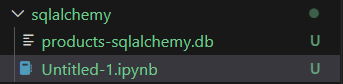

Заполним таблицу данными:

In [3]:
# создаем объект данных
insertion_query = products.insert().values([
    {"product_name": "Banana", "suplier_name": "United Bananas", "price_per_tonne": 7000},
    {"product_name": "Avocado", "suplier_name": "United Avocados", "price_per_tonne": 12000},
    {"product_name": "Tomatoes", "suplier_name": "United Tomatoes", "price_per_tonne": 3100}
])

# выполняем вставку созданного объекта данных
connection.execute(insertion_query)

Поле `product_id` заполняется автоматически, так как `primary key`.

Сохраним выборку `select` запроса:

In [4]:
import sqlalchemy as db


# двигатель БД, отправная точка sql-приложения
engine = db.create_engine('sqlite:///products-sqlalchemy.db')

# устанавливаем соединение с БД
connection = engine.connect()

# создаем объект для хранения таблиц в БД
metadata = db.MetaData()

# создание таблицы
products = db.Table('products', metadata, 
                    db.Column('product_id', db.Integer, primary_key=True),
                    db.Column('product_name', db.Text),
                    db.Column('suplier_name', db.Text),
                    db.Column('price_per_tonne', db.Integer))

metadata.create_all(engine)

# создаем объект данных
insertion_query = products.insert().values([
    {"product_name": "Banana", "suplier_name": "United Bananas", "price_per_tonne": 7000},
    {"product_name": "Avocado", "suplier_name": "United Avocados", "price_per_tonne": 12000},
    {"product_name": "Tomatoes", "suplier_name": "United Tomatoes", "price_per_tonne": 3100}
])

# выполняем вставку созданного объекта данных
connection.execute(insertion_query)

# создаем объект выборки
select_all_query = db.select([products]) # заключаем имя таблицы в спсиок, так как ожидаем множественное знаение

# выполняем операцию с помощью connection
select_all_result = connection.execute(select_all_query)

# вывод в консоль
print(select_all_result.fetchall())

[(1, 'Banana', 'United Bananas', 7000), (2, 'Avocado', 'United Avocados', 12000), (3, 'Tomatoes', 'United Tomatoes', 3100), (4, 'Banana', 'United Bananas', 7000), (5, 'Avocado', 'United Avocados', 12000), (6, 'Tomatoes', 'United Tomatoes', 3100)]


c:\temp1\ipykernel_10248\661510261.py:30: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  connection.execute(insertion_query)


Сделаем выборку с условием:

In [8]:
select_price_query = db.select([products]).where(products.columns.price_per_tonne==12000)
select_price_result = connection.execute(select_price_query)
print(select_price_result.fetchall())

[(2, 'Avocado', 'United Avocados', 12000), (5, 'Avocado', 'United Avocados', 12000)]


Изменим значение БД:

In [9]:
update_query = db.update(products).where(products.columns.suplier_name == "United Bananas").values(suplier_name = "United Fruits")
connection.execute(update_query)

select_all_query = db.select([products])
select_all_result = connection.execute(select_all_query)
print(select_all_result.fetchall())

[(1, 'Banana', 'United Fruits', 7000), (2, 'Avocado', 'United Avocados', 12000), (3, 'Tomatoes', 'United Tomatoes', 3100), (4, 'Banana', 'United Fruits', 7000), (5, 'Avocado', 'United Avocados', 12000), (6, 'Tomatoes', 'United Tomatoes', 3100)]


Удаление записи:

In [10]:
delete_query = db.delete(products).where(products.columns.suplier_name == "United Tomatoes")
connection.execute(delete_query)

select_all_query = db.select([products])
select_all_result = connection.execute(select_all_query)
print(select_all_result.fetchall())

[(1, 'Banana', 'United Fruits', 7000), (2, 'Avocado', 'United Avocados', 12000), (4, 'Banana', 'United Fruits', 7000), (5, 'Avocado', 'United Avocados', 12000)]
